In [1]:
import numpy as np 
from scipy.io import loadmat
import sys 
import os
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder

def set_path():
    if sys.platform == 'darwin':
        print("Current system is macOS")
        main_fold_path = '/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction'
    elif sys.platform == 'linux':
        print("Current system is Ubuntu")
        main_fold_path = '/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning'
    else:
        print("Current system is neither macOS nor Ubuntu")
    os.chdir(main_fold_path)
    sys.path.append(main_fold_path)    

set_path()
from utils.utils_mine import normalize_individual

Current system is Ubuntu


2024-07-29 09:28:19.830924: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-29 09:28:19.848766: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:7704] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-29 09:28:19.848783: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-29 09:28:19.848790: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1520] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-29 09:28:19.852836: I tensorflow/core/platform/cpu_feature_g

Ratio of max/average: 100.37383262875059
Ratio of average/min: -0.00955305856590415


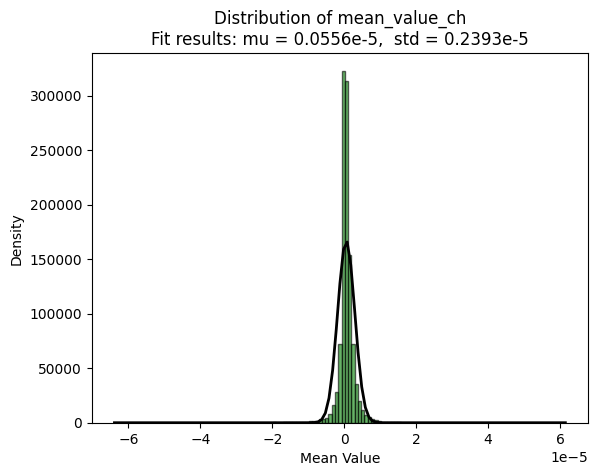

5.55657091532586e-07
2.3925939931860867e-06


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
data = np.load('/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning/allData/diagnosis514/hb_simple_3d.npy')
data = np.concatenate((data[..., 0], data[..., 1], data[..., 2]), axis=-1)

def derive_mean_value_ch(data):
    num_subjects, num_channels, _ = data.shape
    mean_value_ch = np.zeros((num_subjects, num_channels))

    # Step 1: Calculate mean_value_ch for each subject and channel
    for subject in range(num_subjects):
        for channel in range(num_channels):
            mean_value_ch[subject, channel] = np.mean(data[subject, channel])

    # Step 2: Calculate average, max, and min of mean_value_ch
    average_mean_value = np.mean(mean_value_ch)
    max_mean_value = np.max(mean_value_ch)
    min_mean_value = np.min(mean_value_ch)

    # Step 3: Calculate and print the ratios
    ratio_max_avg = max_mean_value / average_mean_value
    ratio_avg_min = average_mean_value / min_mean_value

    print(f"Ratio of max/average: {ratio_max_avg}")
    print(f"Ratio of average/min: {ratio_avg_min}")

    return mean_value_ch

def show_distribution_of_data(data):
    # Step 4: Reshape mean_value_ch and show distribution
    mean_value_ch_reshaped = data.reshape(-1)
    
    # Plot histogram
    plt.hist(mean_value_ch_reshaped, bins=125, density=True, alpha=0.6, color='g', edgecolor='black')
    
    # Fit a normal distribution to the data
    mu, std = norm.fit(mean_value_ch_reshaped)
    
    # Plot the fitting line
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 125)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    
    # Plot details
    title = "Fit results: mu = %.4fe-5,  std = %.4fe-5" % (mu*1e5, std*1e5)
    plt.title('Distribution of mean_value_ch\n' + title)
    plt.xlabel('Mean Value')
    plt.ylabel('Density')
    plt.show()    

value_ch = derive_mean_value_ch(data)
show_distribution_of_data(value_ch)
print(np.mean(value_ch))
print(np.std(value_ch))


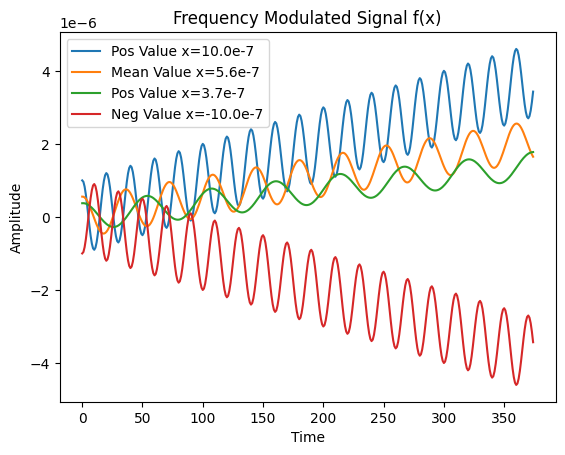

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def frequency_modulation(value, base_frequency=0.05, scaling_factor=1e6, sampling_rate=1, duration=375):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    # Scale the constant value to ensure it significantly affects the frequency
    
    modulated_frequency = value * scaling_factor * base_frequency
    modulated_signal = np.cos(2 * np.pi * modulated_frequency * t) * value
    return modulated_signal + t * value/100

# Example usage
constant_value = 1e-5  # Small constant value
mean_value_ch = np.mean(value_ch)
pos_val = np.median(value_ch)
neg_val = -1e-6

pos_1_val = 1e-6
max_value_ch = np.max(value_ch)
min_value_ch = np.min(value_ch)



modulated_signal_max = frequency_modulation(max_value_ch)
modulated_signal_mean = frequency_modulation(mean_value_ch)
modulated_signal_min = frequency_modulation(min_value_ch)

modulated_signal_pos_1 = frequency_modulation(pos_1_val)
modulated_signal_pos = frequency_modulation(pos_val)
modulated_signal_neg = frequency_modulation(neg_val)



# Plot the modulated signal
# plt.plot(modulated_signal_max, label='Max Value')
plt.plot(modulated_signal_pos_1, label=f'Pos Value x={pos_1_val*1e7:.1f}e-7')

plt.plot(modulated_signal_mean, label=f'Mean Value x={mean_value_ch*1e7:.1f}e-7')
# plt.plot(modulated_signal_min, label='Min Value')
plt.plot(modulated_signal_pos, label=f'Pos Value x={pos_val*1e7:.1f}e-7')

plt.plot(modulated_signal_neg, label=f'Neg Value x={neg_val*1e7:.1f}e-7')

plt.legend()
plt.title('Frequency Modulated Signal f(x)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


(514, 52, 375)
mean data 5.556570915325855e-07
mean data_encoded 1.5952592805385106e-06


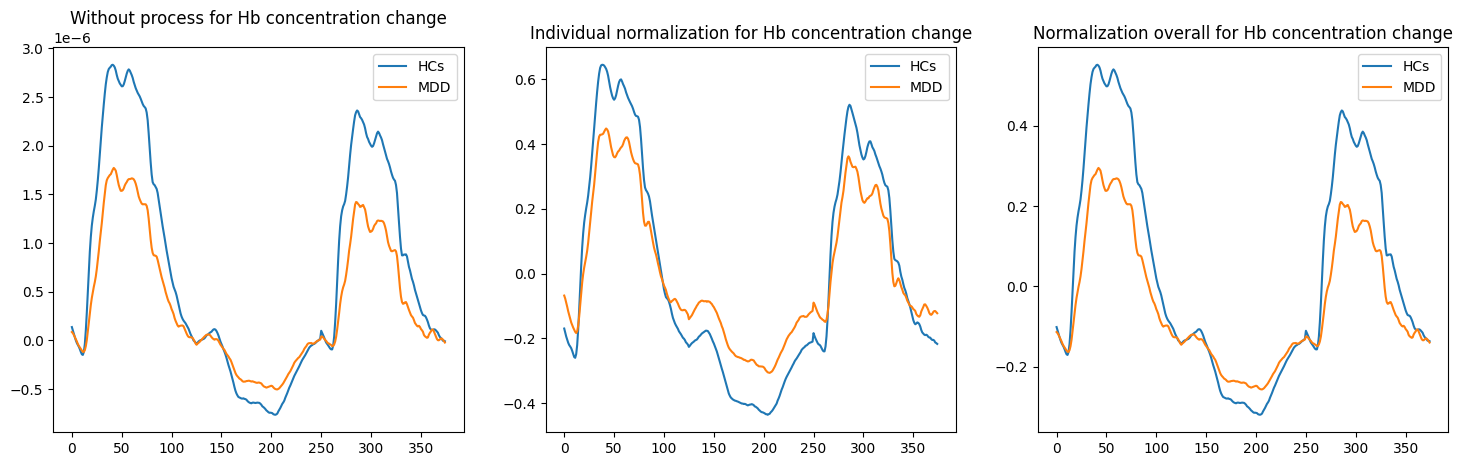

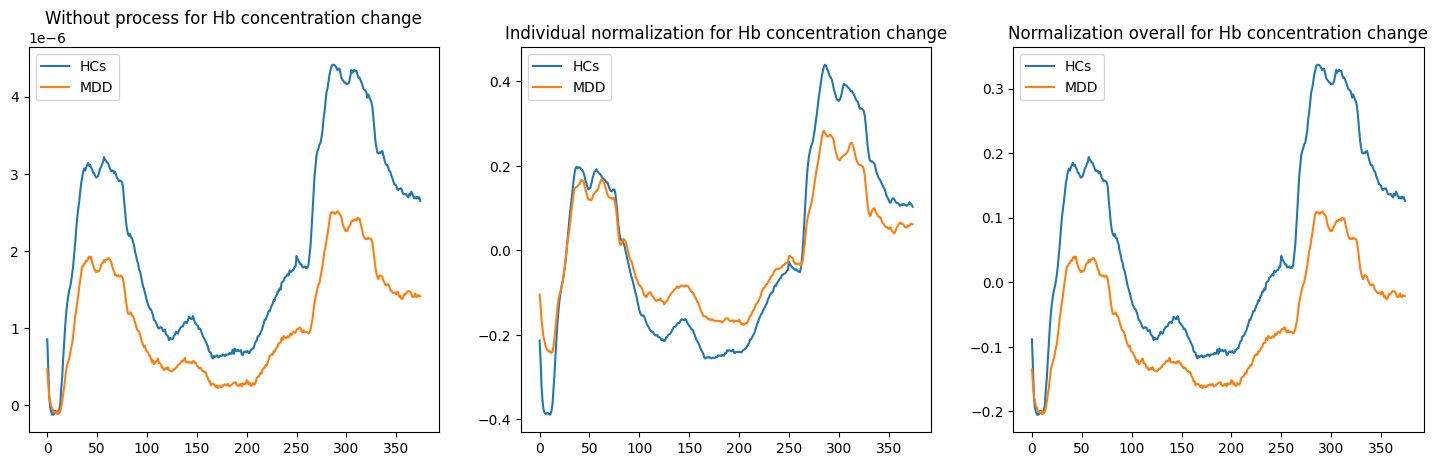

In [45]:

print(data.shape)
    
def frequency_modulation(value, base_frequency=0.05, scaling_factor=1e6, sampling_rate=1, duration=375):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    # Scale the constant value to ensure it significantly affects the frequency
    
    modulated_frequency = value * scaling_factor * base_frequency
    modulated_signal = np.cos(2 * np.pi * modulated_frequency * t) * value
    return modulated_signal + t * value/100


def encode_magnitude(data):
    num_subjects, num_channels, num_datapoint = data.shape
    encoded_data = np.zeros((num_subjects, num_channels, num_datapoint))
    for subject in range(num_subjects):
        for channel in range(num_channels):
            encoded_data[subject, channel] = data[subject, channel] + frequency_modulation(np.mean(data[subject, channel]), duration=num_datapoint)
    return encoded_data

def normalize_individual(data):
    # Iterate over each subject | optimized instead of using for
    normalized_data = np.empty_like(data)

    # if data.ndim >= 3:
    #     # For a 3D array, calculate std along the last two axes
    #     mean = np.mean(data, axis=(1,2), keepdims=True)
    #     std = np.std(data, axis=(1, 2), keepdims=True)
    # elif data.ndim == 2:
    #     # For a 2D array, calculate std along the last axis only
    #     mean = np.mean(data, axis=1, keepdims=True)
    #     std = np.std(data, axis=1, keepdims=True)
    # normalized_data = (data - mean)/std

    for i in range(data.shape[0]):
        # Calculate the mean and standard deviation for the current subject
        mean = np.mean(data[i])
        std = np.std(data[i])

        # Perform z-normalization for the current subject
        normalized_data[i] = (data[i] - mean) / std

    # mean = np.mean(data, axis=(1,2))
    # std = np.std(data, axis=(1,2))

    return normalized_data

def normalize_all(data):
    normalized_data = (data - np.mean(data)) / np.std(data) 
    return normalized_data

data_encoded = encode_magnitude(data)

print('mean data', np.mean(data))
print('mean data_encoded', np.mean(data_encoded))
nor_data_encoded = (data_encoded - np.mean(data_encoded)) / np.std(data_encoded)

label = np.load('/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning/allData/diagnosis514/label.npy')

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
data_0 = data[label == 0]
data_1 = data[label == 1]
data_0_avg = np.mean(data_0, axis=(0, 1))
data_1_avg = np.mean(data_1, axis=(0, 1))
ax[0].set_title('Without process for Hb concentration change')
ax[0].plot(data_0_avg, label=f'HCs')
ax[0].plot(data_1_avg, label=f'MDD')
ax[0].legend()

normalize_individual_data = normalize_individual(data)
data_0_avg = np.mean((normalize_individual_data[label==0]), axis=(0, 1))
data_1_avg = np.mean((normalize_individual_data[label==1]), axis=(0, 1))
ax[1].set_title('Individual normalization for Hb concentration change')
ax[1].plot(data_0_avg, label=f'HCs')
ax[1].plot(data_1_avg, label=f'MDD')
ax[1].legend()

normalize_all_data = normalize_all(data)
data_0_avg = np.mean((normalize_all_data[label==0]), axis=(0, 1))
data_1_avg = np.mean((normalize_all_data[label==1]), axis=(0, 1))
ax[2].set_title('Normalization overall for Hb concentration change')
ax[2].plot(data_0_avg, label=f'HCs')
ax[2].plot(data_1_avg, label=f'MDD')
ax[2].legend()


# plt.figure()
# data_0 = data_encoded[label == 0]
# data_1 = data_encoded[label == 1]
# data_0_avg = np.mean(data_0, axis=(0, 1))
# data_1_avg = np.mean(data_1, axis=(0, 1))
# plt.title('Encoded Magnitude for Hb concentration change')
# plt.plot(data_0_avg, label=f'HCs')
# plt.plot(data_1_avg, label=f'MDD')


fig, ax = plt.subplots(1, 3, figsize=(18, 5))
data_0 = data_encoded[label == 0]
data_1 = data_encoded[label == 1]
data_0_avg = np.mean(data_0, axis=(0, 1))
data_1_avg = np.mean(data_1, axis=(0, 1))
ax[0].set_title('Without process for Hb concentration change')
ax[0].plot(data_0_avg, label=f'HCs')
ax[0].plot(data_1_avg, label=f'MDD')
ax[0].legend()

normalize_individual_data = normalize_individual(data_encoded)
data_0_avg = np.mean(normalize_individual_data[label==0], axis=(0, 1))
data_1_avg = np.mean(normalize_individual_data[label==1], axis=(0, 1))
ax[1].set_title('Individual normalization for Hb concentration change')
ax[1].plot(data_0_avg, label=f'HCs')
ax[1].plot(data_1_avg, label=f'MDD')
ax[1].legend()

normalize_all_data = normalize_all(data_encoded)
data_0_avg = np.mean(normalize_all_data[label==0], axis=(0, 1))
data_1_avg = np.mean(normalize_all_data[label==1], axis=(0, 1))
ax[2].set_title('Normalization overall for Hb concentration change')
ax[2].plot(data_0_avg, label=f'HCs')
ax[2].plot(data_1_avg, label=f'MDD')
ax[2].legend()


# plt.figure()
# data_0 = data_encoded[label == 0]
# data_1 = data_encoded[label == 1]
# data_0_avg = np.mean(data_0, axis=(0, 1))
# data_1_avg = np.mean(data_1, axis=(0, 1))
# plt.title('Encoded Magnitude for Hb concentration change')
# plt.plot(data_0_avg, label=f'HCs')
# plt.plot(data_1_avg, label=f'MDD')



# plt.legend()


# plt.figure()
# data_0 = nor_data_encoded[label == 0]
# data_1 = nor_data_encoded[label == 1]
# data_0_avg = np.mean(data_0, axis=(0, 1))
# data_1_avg = np.mean(data_1, axis=(0, 1))
# plt.title('Nor Encoded Magnitude for Hb concentration change')
# plt.plot(data_0_avg, label=f'HCs')
# plt.plot(data_1_avg, label=f'MDD')

# plt.legend()


# load_data_encoded_01 = np.load('allData/diagnosis514/nor_01_encoded_mag_hb_simple_all_1d.npy')

# plt.figure()
# data_0 = load_data_encoded_01[label == 0]
# data_1 = load_data_encoded_01[label == 1]
# data_0_avg = np.mean(data_0, axis=(0, 1))
# data_1_avg = np.mean(data_1, axis=(0, 1))
# plt.title('Encoded Magnitude for Hb concentration change')
# plt.plot(data_0_avg, label=f'Max min nor Channel in Class 0')
# plt.plot(data_1_avg, label=f'Max min nor Channel in Class 1')
# plt.legend()


# load_data_encoded_01 = np.load('allData/diagnosis514/nor_ind_encoded_mag_hb_simple_all_1d.npy')

# plt.figure()
# data_0 = load_data_encoded_01[label == 0]
# data_1 = load_data_encoded_01[label == 1]
# data_0_avg = np.mean(data_0, axis=(0, 1))
# data_1_avg = np.mean(data_1, axis=(0, 1))
# plt.title('Encoded Magnitude for Hb concentration change')
# plt.plot(data_0_avg, label=f'Individual nor Channel in Class 0')
# plt.plot(data_1_avg, label=f'Individual nor Channel in Class 1')
# plt.legend()




# # for sub in range(10):
# #     fig, ax = plt.subplots(3, 1)
# #     ax[0].imshow(data[sub], aspect='auto')
# #     ax[1].imshow(data_encoded[sub], aspect='auto')
# #     ax[2].imshow(nor_data_encoded[sub], aspect='auto')
# #     plt.show()
    
# #     plt.figure()
# #     for i in range(25, 27):
# #         plt.plot(data[sub, i], label=f'original Channel {i}')
# #         plt.plot(data_encoded[sub, i], label=f'encoded Channel {i}')
# #         plt.plot(nor_data_encoded[sub, i], label=f'normalized Channel {i}')
# #         plt.legend()



In [38]:
normalize_all_data.mean()


-2.835648950454356e-19